In [175]:
import numpy as np
import matplotlib.pyplot as plt

In [176]:
x_range = [-10, 10]
x_diff = x_range[1] - x_range[0]
def plot_func(func):
    x = np.arange(x_range[0], x_range[1], 0.01)
    y = func(x)
    plt.plot(x, y)

In [177]:
def plot_points(x, y):
    plt.xlim(x_range[0], x_range[1])
    plt.scatter(x, y)

In [184]:
def gpr_plot(func, x_train, y_train, x_test, mu, var):
    x = np.arange(x_range[0], x_range[1], 0.01)
    y = func(x)
    plt.plot(x, y)
    plt.scatter(x_train, y_train, color='orange')
    _var = np.zeros(x_test.shape)
    for i in range(len(x_test)):
        _var[i] = var[i][i]
    plt.scatter(x_test, mu+2*_var, color='green', s=25)
    plt.scatter(x_test, mu-2*_var, color='green', s=25)
    plt.scatter(x_test, mu, color='black', marker='x')

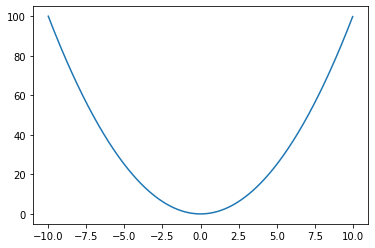

In [178]:
target_func = lambda x: x*x
plot_func(target_func)

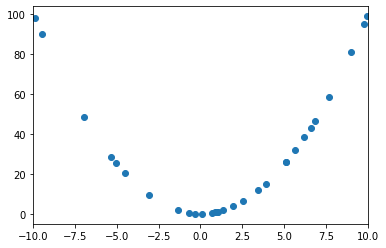

In [179]:
get_sample = lambda num: (x_range[1] - x_range[0]) * np.random.rand(num, 1) + x_range[0]

n_sample = 30
x_train = get_sample(n_sample)
y_train = target_func(x_train)
plot_points(x_train, y_train)


In [180]:
def gauss_kernel(x1, x2, theta1, theta2):
    return theta1 * np.exp(-np.abs(x1 - x2) / theta2)

In [181]:
def gpr(x_test, x_train, y_train, kernel):
    n_train = len(x_train)
    n_test = len(x_test)
    K = np.zeros((n_train, n_train))
    k = np.zeros((n_train, n_test))
    s = np.zeros((n_test, n_test))
    for i in range(n_train):
        for j in range(n_train):
            K[i][j] = kernel(x_train[i], x_train[j])
    K_inv = np.linalg.inv(K)
    for i in range(n_train):
        for j in range(n_test):
            k[i][j] = kernel(x_train[i], x_test[j])
    for i in range(n_test):
        s[i][i] = kernel(x_test[i], x_test[i])
    mu = k.T @ K_inv @ y_train
    var = s - k.T @ K_inv @ k
    return mu, var


In [182]:
## TODO: theta
kernel = lambda x1, x2: gauss_kernel(x1, x2, 1.0, 1.0)
x_test = get_sample(5)
mu, var = gpr(x_test, x_train, y_train, kernel)
print(f'mu = {mu}, var = {var}')

mu = [[ 0.07991589]
 [34.79520646]
 [21.03110387]
 [40.77010731]
 [ 1.25445435]], var = [[ 1.58395031e-01 -2.62941283e-04 -9.86859954e-03 -1.72605764e-04
  -3.97990058e-01]
 [-2.62941283e-04  8.39467323e-01 -2.59486223e-06 -1.49540913e-01
  -1.04648016e-04]
 [-9.86859954e-03 -2.59486223e-06  3.92712189e-01 -1.70337717e-06
  -2.47960956e-02]
 [-1.72605764e-04 -1.49540913e-01 -1.70337717e-06  8.29564603e-01
  -6.86953782e-05]
 [-3.97990058e-01 -1.04648016e-04 -2.47960956e-02 -6.86953782e-05
   1.30339109e-01]]


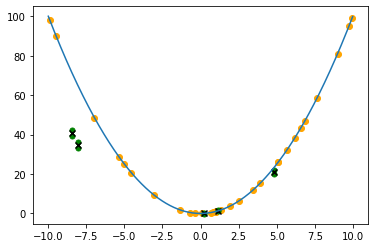

In [186]:
gpr_plot(target_func, x_train, y_train, x_test, mu, var)